# **EXPLORATORY DATA ANALYSIS OF FINANCIAL CONSUMER COMPLAINTS FOR BANK OF AMERICA(2017-2023)**

## EXPLORATORY DATA ANALYSIS AND VISUALISATION
**Objective:**
Uncover patterns, trends, and relationships within Bank of America’s complaints to understand customer concerns and operational performance.

**Analysis Approach:**

- Univariate Analysis – Explore individual fields (products, issues, responses).

- Bivariate Analysis – Compare variables such as product vs issue, year vs complaints.

- Multivariate Analysis – Analyse deeper relationships like issue clusters across products and timeliness trends.

- Time-Series Exploration – Identify yearly and seasonal variations in complaint volume.


**Tools Used:**

- Pandas – Grouping and summarization

- Matplotlib – Core visualizations

- Seaborn – Statistical charts and heatmaps


In [9]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import pandas library

import pandas as pd
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset

file_path = "/Users/arsha/Downloads/Consumer_Complaints.xlsx"
df = pd.read_excel(file_path)
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


### Setup for Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Ensure time-based columns exist

df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month
df['YearMonth'] = df['Date received'].dt.to_period('M').astype(str)


### Univariate Analysis 

This stage focuses on exploring individual variables to understand their distributions, such as which products and issues attract the most complaints and how complaints are submitted and resolved.


#### Distribution of Complaints by Product


In [9]:
# Complaints per Product

df['Product'].value_counts()


Product
Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Mortgage                                                                         6601
Money transfer, virtual currency, or money service                               3453
Debt collection                                                                  2736
Vehicle loan or lease                                                             633
Payday loan, title loan, or personal loan                                         333
Student loan                                                                       39
Name: count, dtype: int64

*We count the number of complaints for each product category to identify which areas customers complain about the most.
The product with the highest complaints emerges clearly (commonly checking/savings accounts or credit cards), indicating primary customer dissatisfaction areas.*

*Complaints are concentrated in a few major product categories (e.g., credit cards, checking/savings accounts), indicating these as key areas of customer dissatisfaction.*

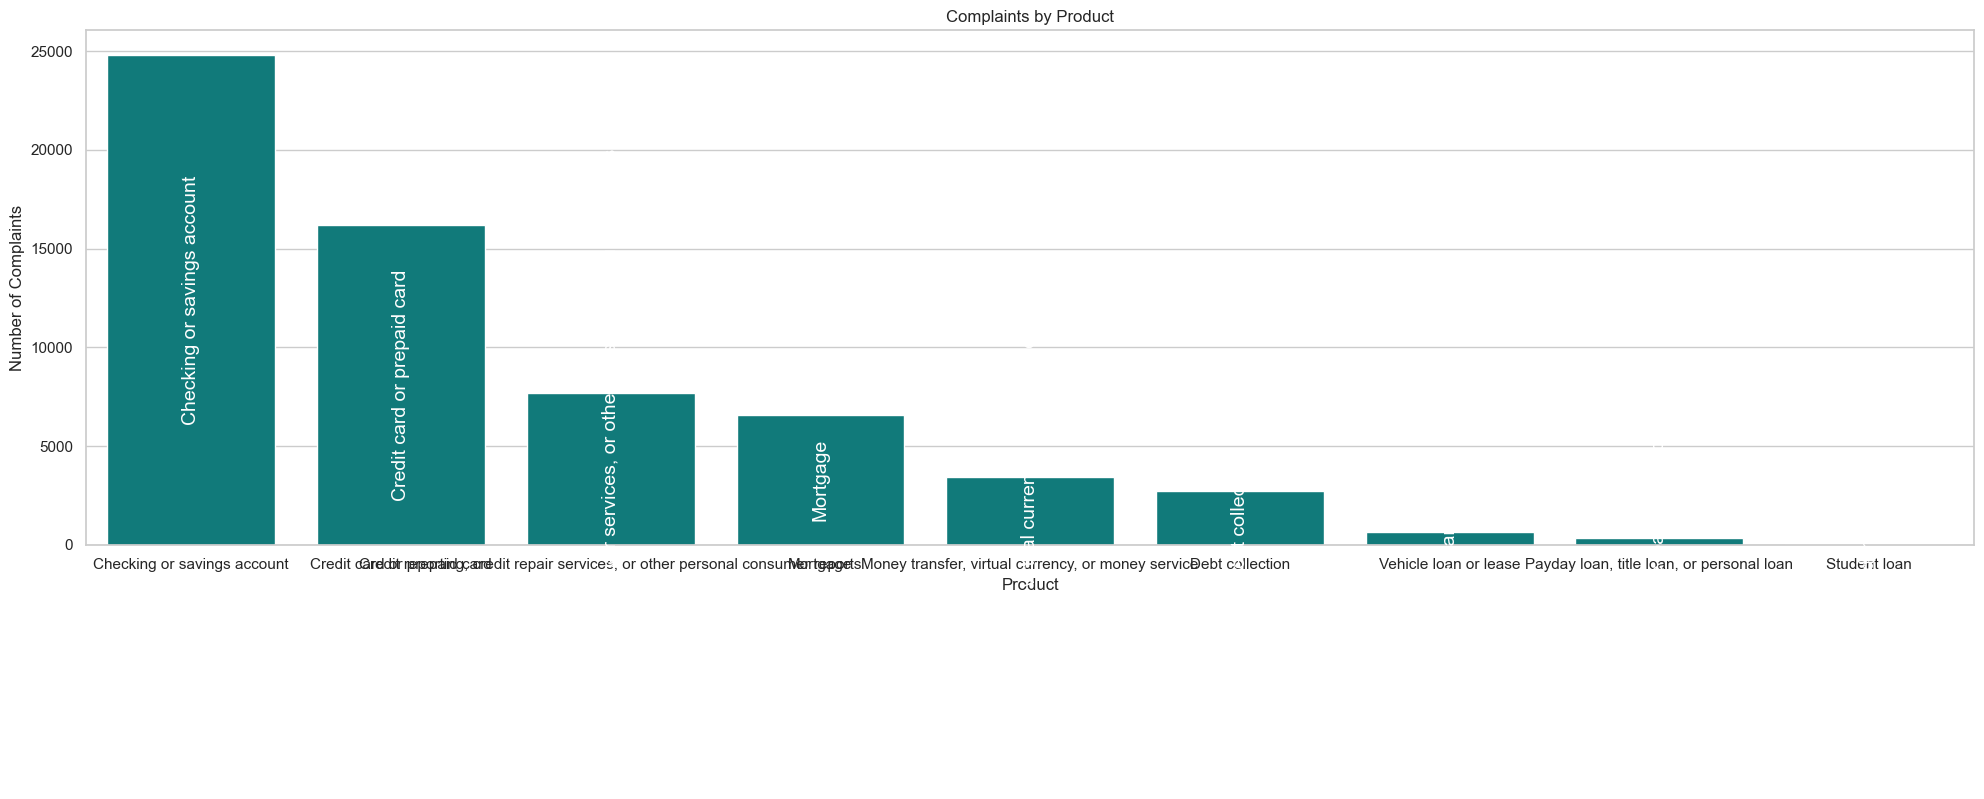

In [163]:
complaints_by_product = df['Product'].value_counts()

plt.figure(figsize=(20,8))
ax=sns.barplot(x=complaints_by_product.index, y=complaints_by_product.values,color='darkcyan')
plt.xticks(rotation=0)
plt.title('Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
for i, v in enumerate(complaints_by_product.values):
    ax.text(
        i, 
        v/2,   
        complaints_by_product.index[i], 
        ha='center', 
        va='center', 
        fontsize=14, 
        color='white', 
        rotation=90
    )
plt.tight_layout()
plt.show()

#### Top 10 Most Common Complaint Issues

In [34]:
# Most Common Issues

top_issues = df['Issue'].value_counts().head(10)
top_issues



Issue
Managing an account                                                                 15109
Incorrect information on your report                                                 4931
Problem with a purchase shown on your statement                                      4415
Closing an account                                                                   2953
Trouble during payment process                                                       2827
Opening an account                                                                   2725
Problem with a lender or other company charging your account                         2493
Fraud or scam                                                                        1987
Struggling to pay mortgage                                                           1904
Problem with a credit reporting company's investigation into an existing problem     1876
Name: count, dtype: int64

*Here we identify the top 10 most commonly reported issues across Bank of America complaints. Issues related to account management, incorrect information, or transaction problems appear as the most common themes.*

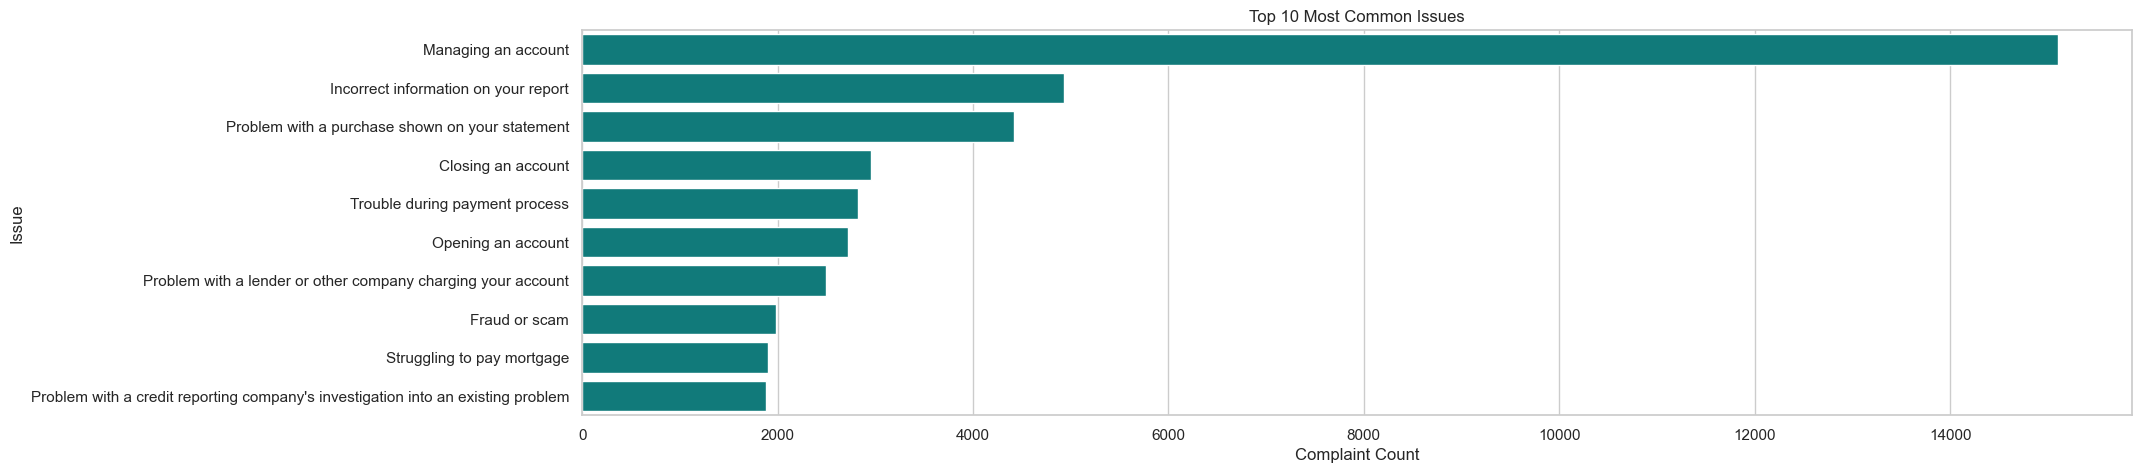

In [148]:
plt.figure(figsize=(20,5))
sns.barplot(x=top_issues.values, 
            y=top_issues.index, 
            color='darkcyan')
plt.title('Top 10 Most Common Issues')
plt.xlabel('Complaint Count')
plt.ylabel('Issue')
plt.show()


*Managing an account is by far the most common issue, with complaint counts significantly higher than all other categories. Issues such as Incorrect information on your report and Problem with a purchase shown on your statement appear next but at much lower levels. This indicates that account management difficulties represent the biggest source of customer frustration.*

#### Distribution of Complaint Submission Methods

In [45]:
# Complaint Submission Channels

submission_counts = df['Submitted via'].value_counts()
submission_counts


Submitted via
Web             45423
Referral        10766
Phone            4684
Postal mail      1318
Fax               233
Web Referral       90
Email               2
Name: count, dtype: int64

*Here we examine how customers submitted their complaints, such as through Web, Phone, Email, or Referral.The output shows the preferred communication channels. Typically, the Web is the most used method, but this will confirm whether that trend holds for this dataset.*

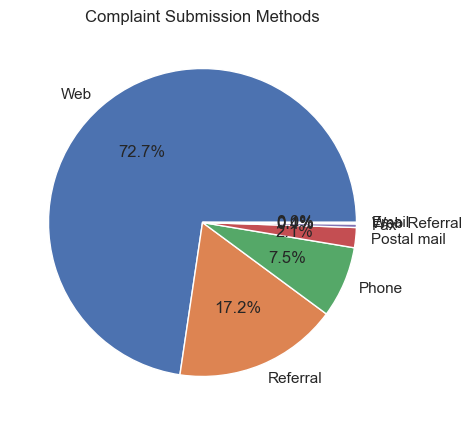

In [50]:
plt.figure(figsize=(20,5))
plt.pie(submission_counts, labels=submission_counts.index, autopct='%1.1f%%')
plt.title('Complaint Submission Methods')
plt.show()


*The pie chart shows that most complaints (72.7%) are submitted through the Web, indicating that customers heavily prefer online channels when reporting issues. Referral submissions make up the second-largest share (17.2%), while phone submissions account for 7.5%. All other methods—postal mail, fax, and email—are used very rarely. Overall, complaint reporting is overwhelmingly digital..*

#### Company response distribution

In [55]:
# Company response type distribution
response_counts = df['Company response to consumer'].value_counts()
response_counts


Company response to consumer
Closed with explanation            41044
Closed with monetary relief        14697
Closed with non-monetary relief     5273
In progress                         1494
Closed                                 8
Name: count, dtype: int64

*In this step, We summarize how complaints are typically resolved and visualize the distribution of company responses.*


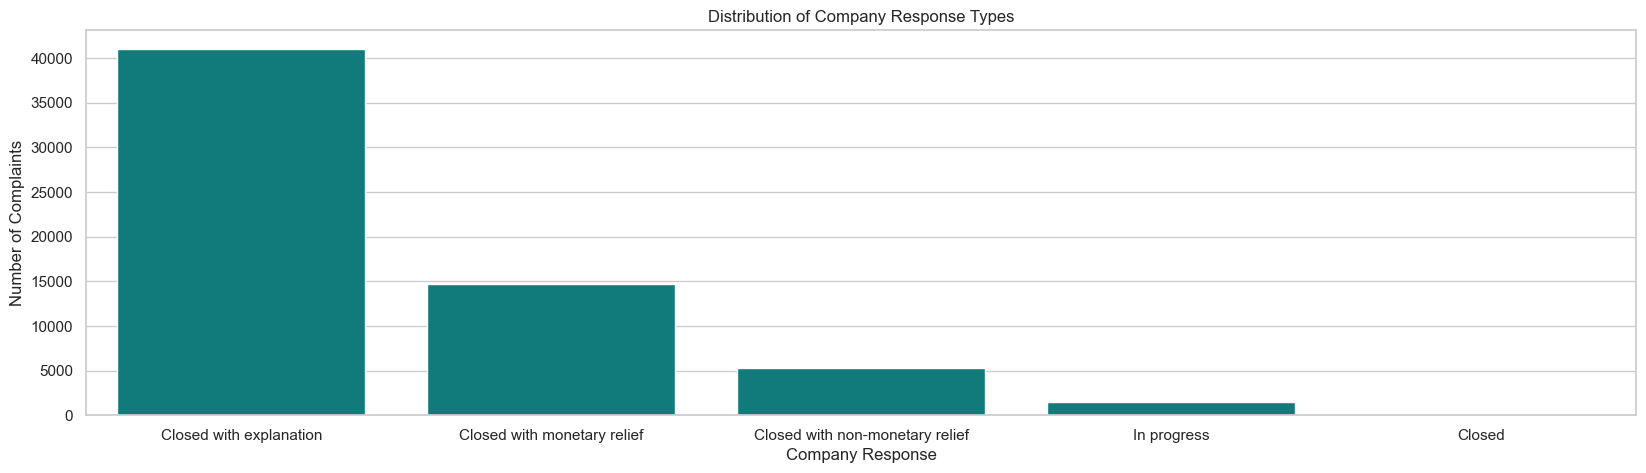

In [149]:
plt.figure(figsize=(20,5))
sns.barplot(x=response_counts.index, 
            y=response_counts.values, 
            color='darkcyan')
plt.xticks(rotation=0)
plt.title('Distribution of Company Response Types')
plt.xlabel('Company Response')
plt.ylabel('Number of Complaints')
plt.show()


*The chart shows that “Closed with explanation” is by far the most common response, indicating that most complaints are resolved by providing clarification rather than compensation. Monetary relief is much less frequent, and non-monetary relief appears even lower. Only a small number of cases remain “In progress,” and very few are marked simply as “Closed.” Overall, the bank primarily resolves complaints through explanation rather than financial action.*

#### Timely vs Untimely Responses

In [59]:
timely_counts = df['Timely response?'].value_counts(dropna=False)
timely_counts

Timely response?
Yes    58619
No      2403
NaN     1494
Name: count, dtype: int64

*This code checks how many complaints received a timely response versus an untimely response. Any “No” values represent delayed responses, which are important for understanding service gaps and regulatory compliance issues.*

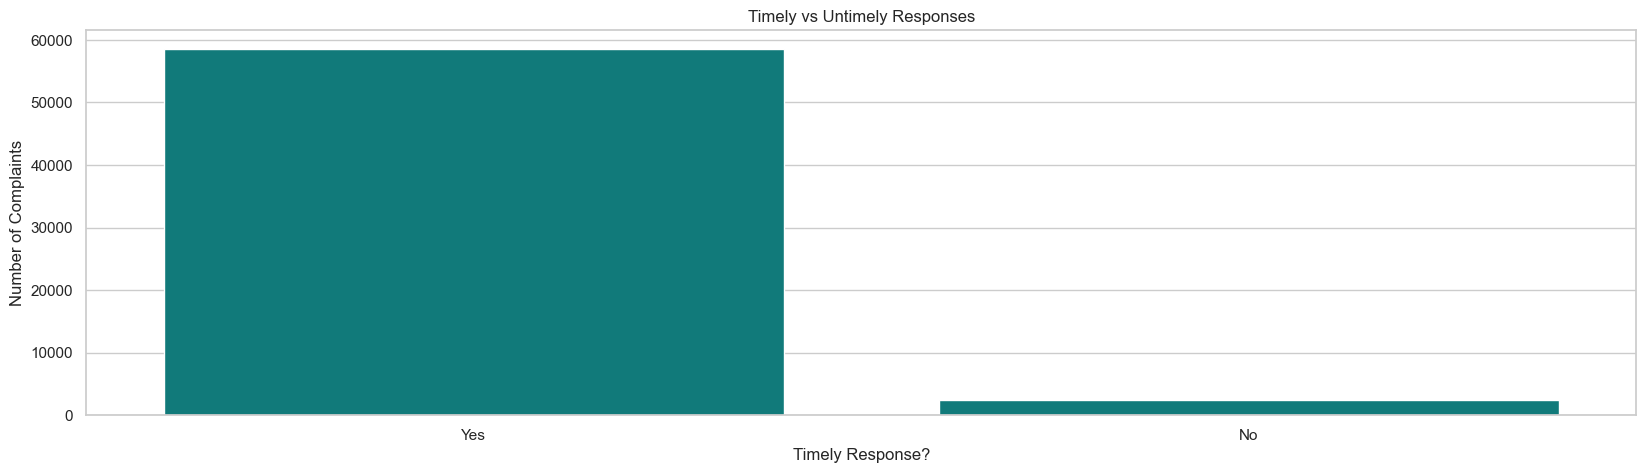

In [150]:

plt.figure(figsize=(20,5))
sns.barplot(x=timely_counts.index, 
            y=timely_counts.values, 
            color='darkcyan')
plt.title('Timely vs Untimely Responses')
plt.xlabel('Timely Response?')
plt.ylabel('Number of Complaints')
plt.show()


*The chart shows that the overwhelming majority of complaints receive a timely response, with timely cases far outnumbering untimely ones. Only a very small fraction of complaints are handled late, indicating that the bank maintains strong responsiveness overall..*

### Bivariate Analysis

Bivariate analysis explores relationships between pairs of variables to uncover patterns in trends, products, issues, and response behavior.
These relationships help determine which complaint types are dominant within each product category and how response performance varies across categories.


#### Heatmap of Complaint Issues Across Product Categories
*We create a matrix of complaint counts for each Product–Issue combination and visualize it using a heatmap.*

In [65]:
# Product vs Issue

pivot_pi = df.pivot_table(index='Product', 
                          columns='Issue', 
                          values='Complaint ID', 
                          aggfunc='count', 
                          fill_value=0)
pivot_pi.head()


Issue,Advertising,"Advertising and marketing, including promotional offers",Applying for a mortgage or refinancing an existing mortgage,Attempts to collect debt not owed,Can't contact lender or servicer,Can't stop withdrawals from your bank account,Charged fees or interest you didn't expect,Closing an account,Closing on a mortgage,Closing your account,...,Trouble using your card,Unable to get your credit report or credit score,Unauthorized transactions or other transaction problem,Unexpected or other fees,Vehicle was damaged or destroyed the vehicle,Vehicle was repossessed or sold the vehicle,"Was approved for a loan, but didn't receive money","Was approved for a loan, but didn't receive the money",Written notification about debt,Wrong amount charged or received
Product,,,,,,,,,,,,,,,,,,,,,
Checking or savings account,0,0,0,0,0,0,0,2953,0,0,...,0,5,0,0,0,0,0,0,0,0
Credit card or prepaid card,14,487,0,0,0,0,0,0,0,1077,...,346,6,0,570,0,0,0,0,0,0
"Credit reporting, credit repair services, or other personal consumer reports",0,0,0,0,0,0,0,0,0,0,...,0,46,0,2,0,0,0,0,0,0
Debt collection,0,0,0,1351,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,487,0
"Money transfer, virtual currency, or money service",0,0,0,0,0,0,0,0,0,0,...,0,0,155,90,0,0,0,0,0,50


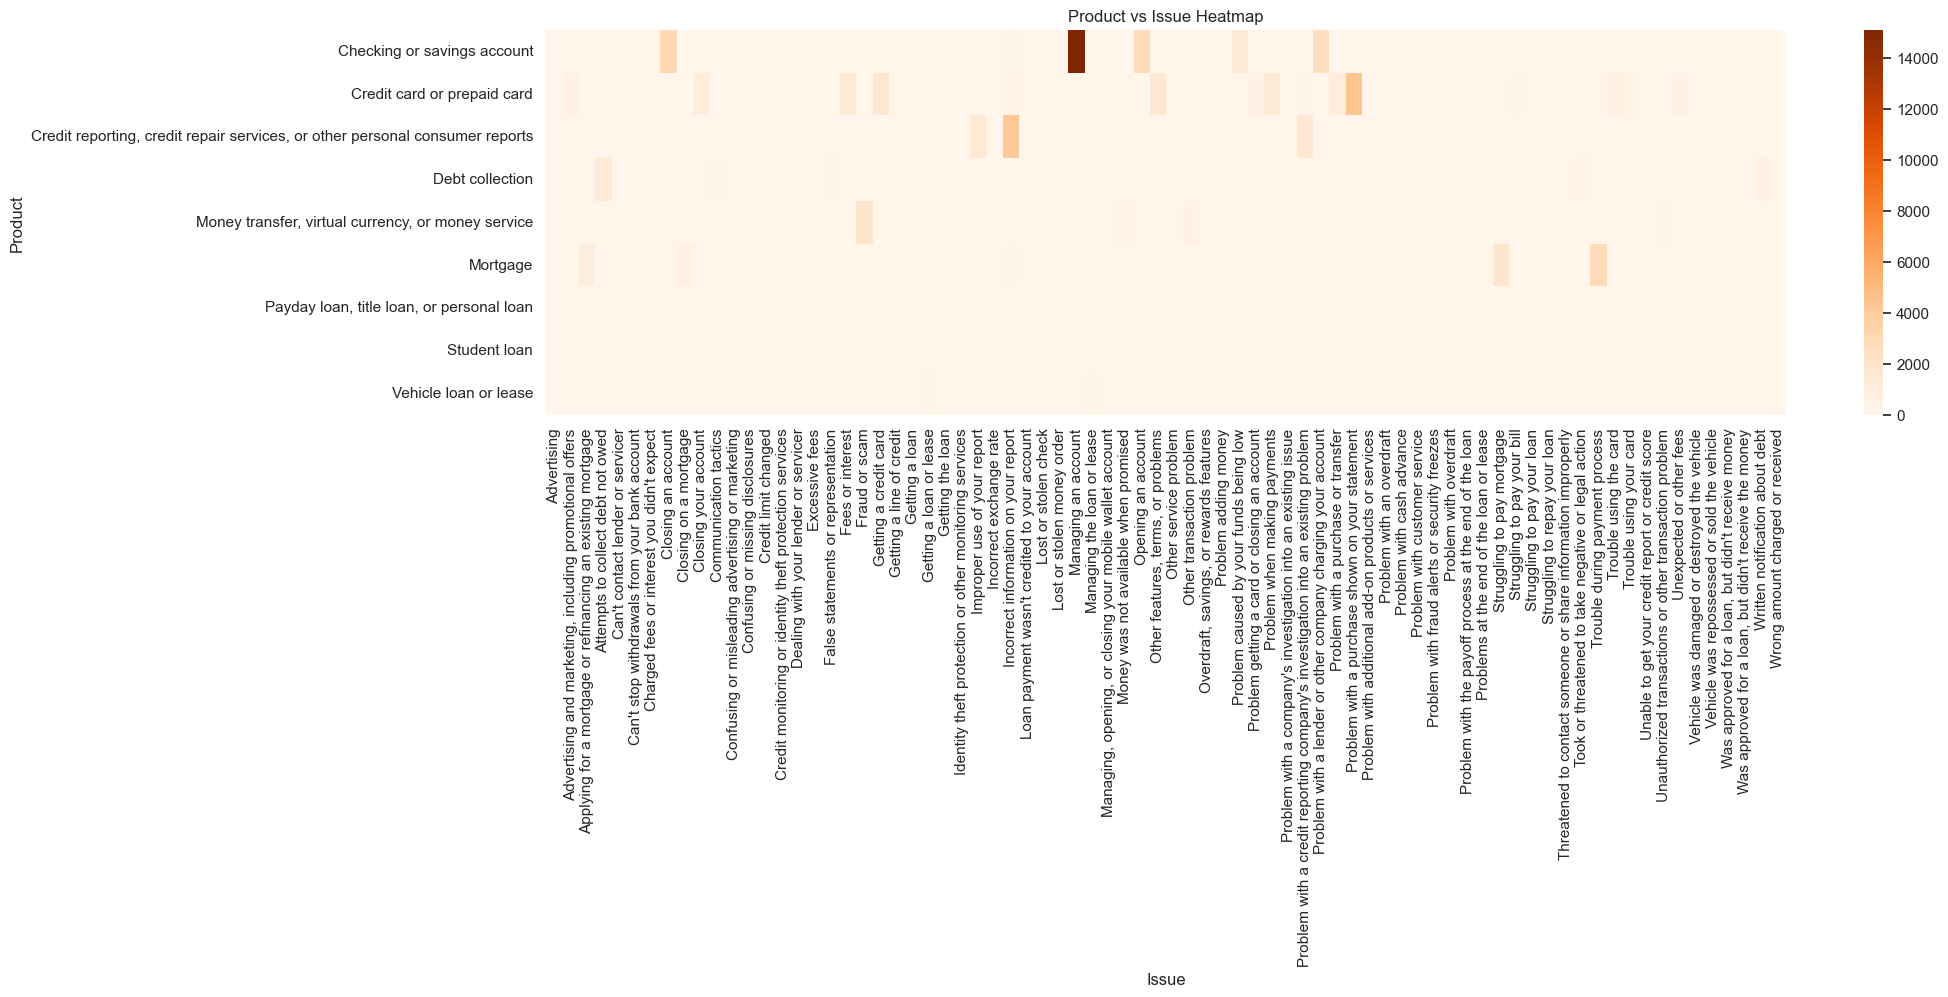

In [117]:

plt.figure(figsize=(20,5))
sns.heatmap(pivot_pi, cmap='Oranges')
plt.title('Product vs Issue Heatmap')
plt.xlabel('Issue')
plt.ylabel('Product')
plt.show()


*The heatmap shows that most products have a wide range of issues, but one issue clearly dominates: “Managing an account,” which is especially frequent for checking/savings accounts and credit cards. This issue appears far more often than any other product–issue combination, indicating it is the most significant driver of complaints. Other issues show lighter, more scattered activity across products, suggesting smaller and more evenly distributed concerns. Overall, the heatmap highlights that account management problems are the most concentrated and widespread issue across major banking products.*

#### Complaint Resolution Patterns Across Products
*We analyze how the type of company response varies across different products.*

In [83]:
# Product vs Company Response

product_response = df.groupby(['Product','Company response to consumer'])['Complaint ID'] \
                     .count().unstack(fill_value=0)
product_response.head()


Company response to consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,In progress
Product,,,,,
Checking or savings account,0,14836,8027,1241,710
Credit card or prepaid card,5,9361,4798,1621,412
"Credit reporting, credit repair services, or other personal consumer reports",2,6067,273,1178,190
Debt collection,0,2367,111,209,49
"Money transfer, virtual currency, or money service",0,2709,634,41,69


<Figure size 2500x500 with 0 Axes>

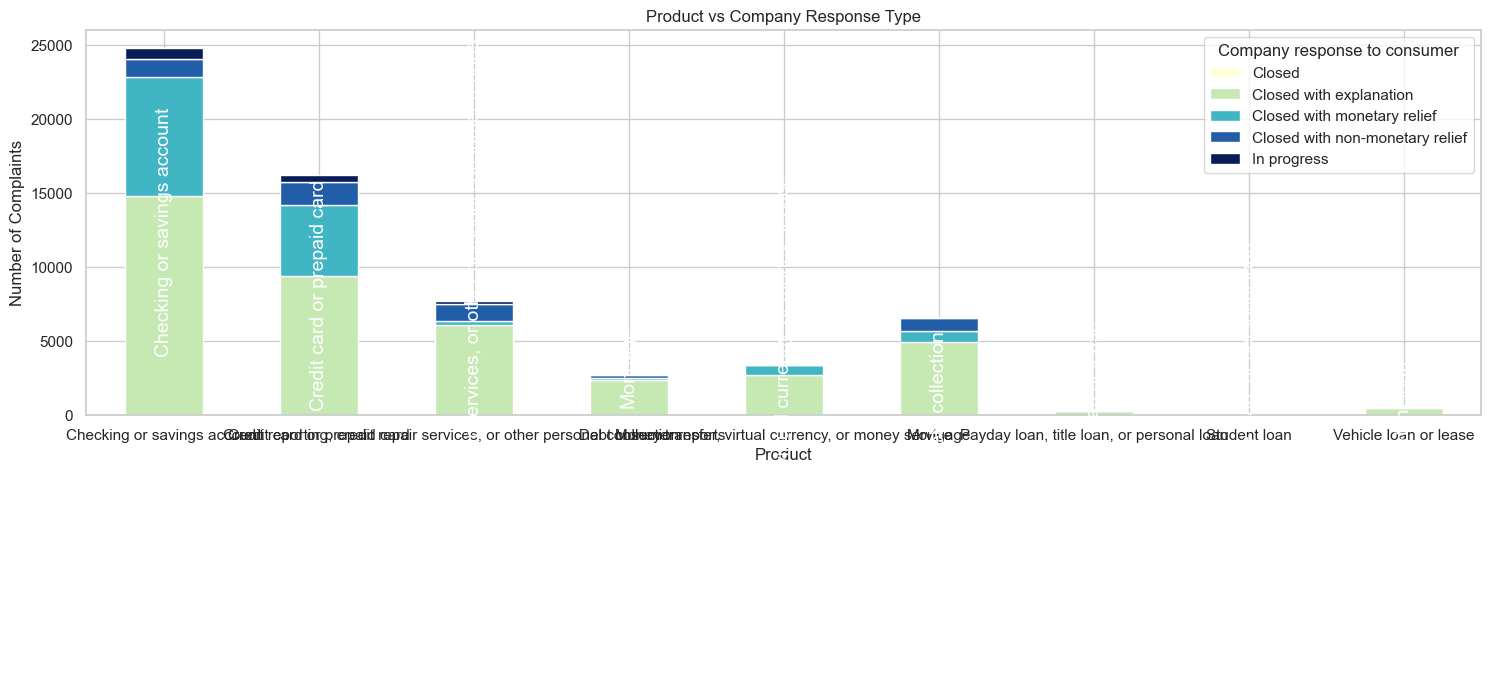

In [164]:
plt.figure(figsize=(25,5))
ax= product_response.plot(kind='bar', stacked=True, figsize=(18,5), colormap='YlGnBu')
plt.xticks(rotation=0)
plt.title('Product vs Company Response Type')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
for i, v in enumerate(complaints_by_product.values):
    ax.text(
        i, 
        v/2,   
        complaints_by_product.index[i], 
        ha='center', 
        va='center', 
        fontsize=14, 
        color='white', 
        rotation=90
    )

plt.show()


*Different products show different distributions of response types (e.g., explanation vs monetary relief), helping understand how complaints are typically resolved for each product category.*

#### Timely vs Untimely Responses for Each Product
*We compare timely and untimely responses across different products.*

In [84]:
#Product vs Timely Response

prod_timely = df.groupby(['Product','Timely response?'])['Complaint ID'] \
                .count().unstack(fill_value=0)
prod_timely.head()




Timely response?,No,Yes
Product,,
Checking or savings account,867,23237
Credit card or prepaid card,689,15096
"Credit reporting, credit repair services, or other personal consumer reports",475,7045
Debt collection,173,2514
"Money transfer, virtual currency, or money service",140,3244


<Figure size 2000x500 with 0 Axes>

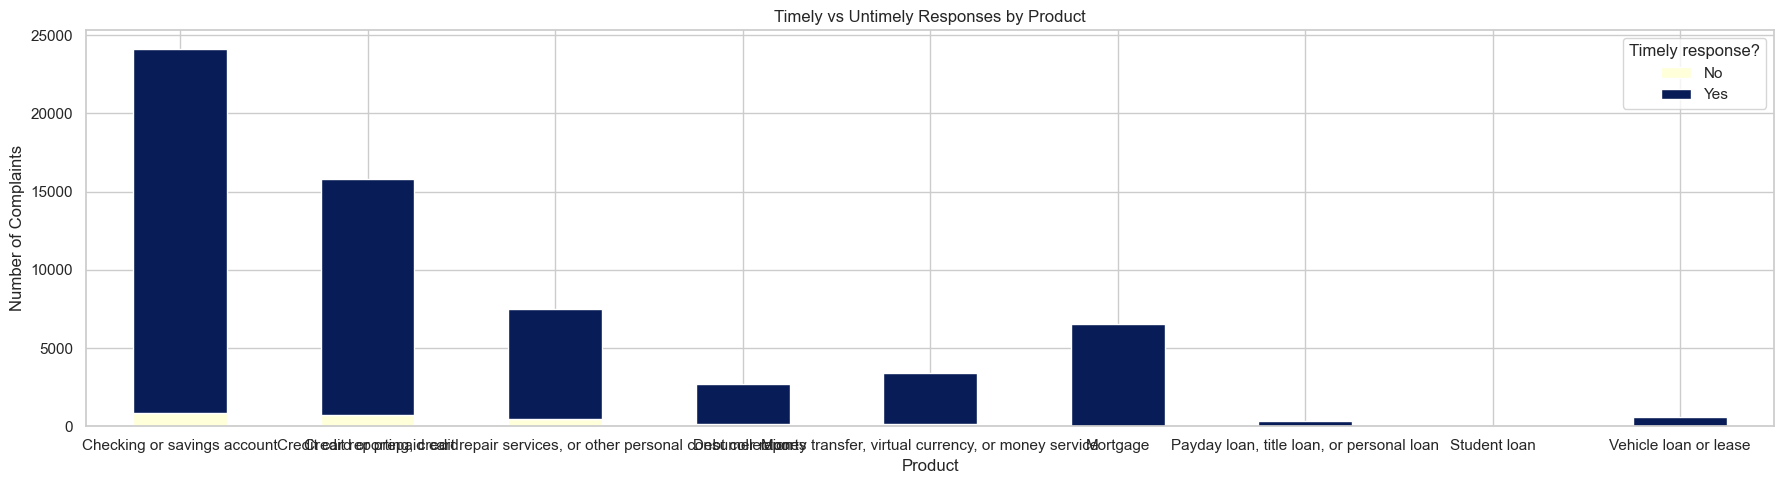

In [90]:
plt.figure(figsize=(20,5))
prod_timely.plot(kind='bar', stacked=True, figsize=(18,5), colormap='YlGnBu')
plt.xticks(rotation=0)
plt.title('Timely vs Untimely Responses by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()


*The chart shows that almost all products receive a very high number of timely responses, especially checking/savings accounts and credit cards, which also have the largest complaint volumes. Untimely responses are minimal across all products, appearing only as very small bars in comparison. Overall, the bank responds on time for the vast majority of complaints, and delays are rare even in high-volume categories.*


#### Annual Trend of Consumer Complaints (2017–2023)
We aggregate complaints by year and visualize the annual trend.

In [91]:
# Complaints per year
complaints_year = df.groupby('Year')['Complaint ID'].count()
complaints_year


Year
2017     5369
2018     7884
2019     7075
2020     8943
2021    11133
2022    12936
2023     9176
Name: Complaint ID, dtype: int64

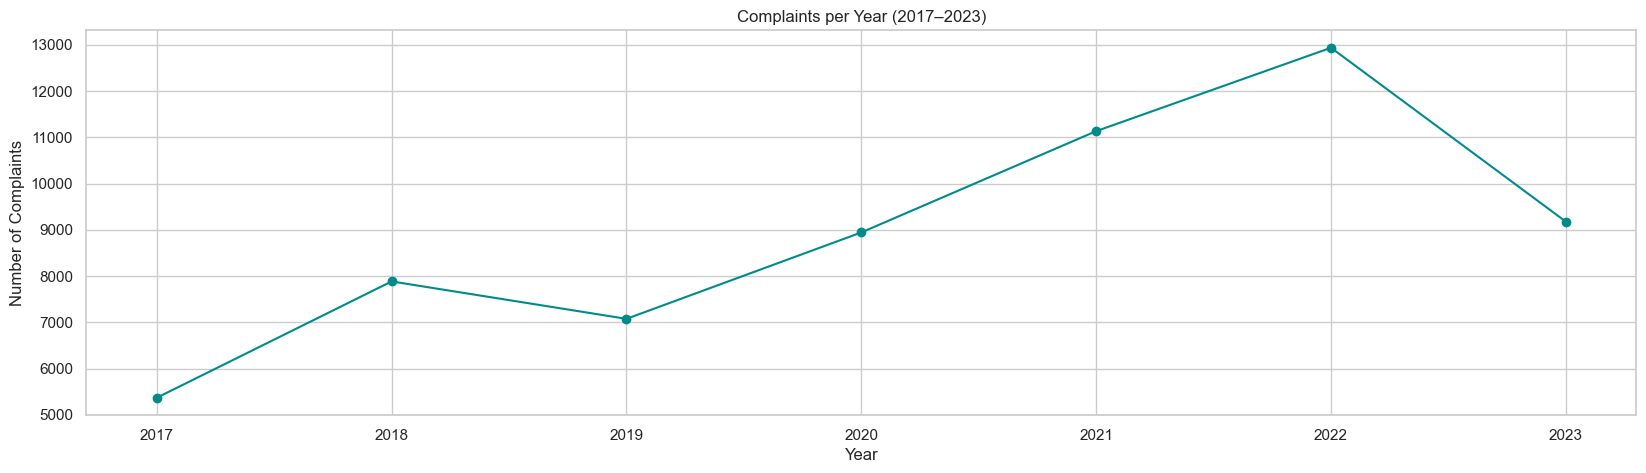

In [119]:
# Visualize complaints per year
plt.figure(figsize=(20,5))
plt.plot(complaints_year.index, complaints_year.values, 
         marker='o', color='darkcyan')
plt.title('Complaints per Year (2017–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()


*The chart shows a clear upward trend in complaints from 2017 to 2022, with volumes rising steadily and peaking in 2022, the year with the highest number of complaints. In 2023, complaint counts drop noticeably but remain higher than the early years. Overall, the number of complaints has grown significantly over time, suggesting increasing customer dissatisfaction or greater reporting activity.*

#### Seasonal Pattern of Complaints by Month
We aggregate complaints by calendar month to detect seasonality over the entire period.

In [94]:
# Complaints per month (across all years)
complaints_month = df.groupby('Month')['Complaint ID'].count()
complaints_month


Month
1     4868
2     4510
3     5284
4     5359
5     5748
6     5534
7     6455
8     5735
9     4762
10    4936
11    4632
12    4693
Name: Complaint ID, dtype: int64

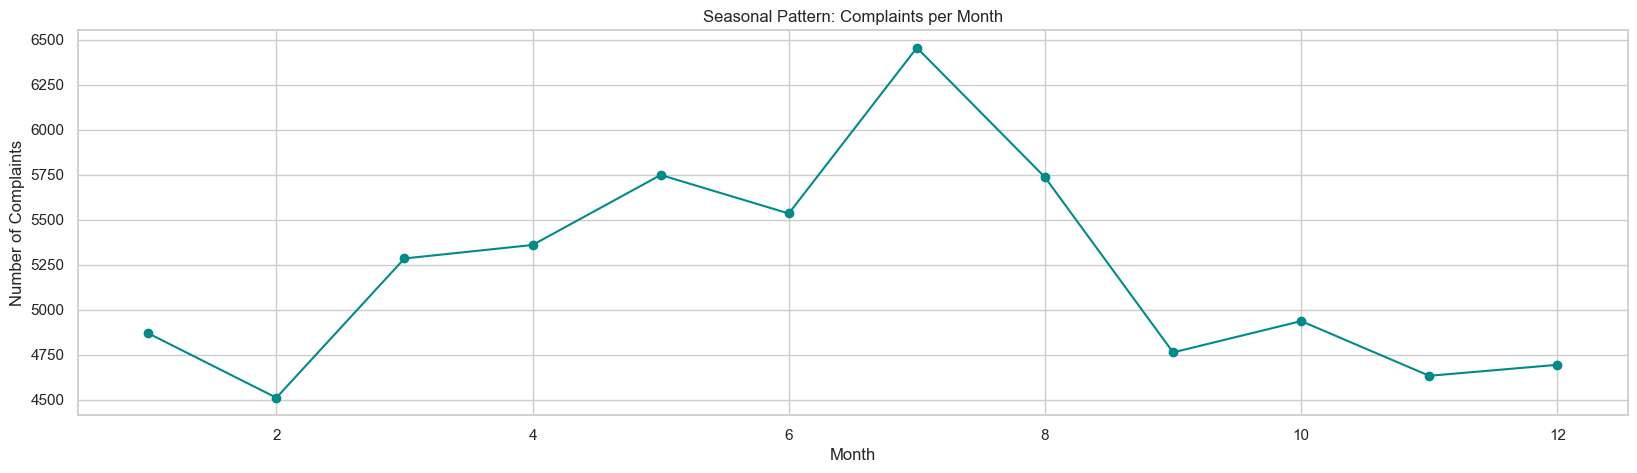

In [120]:
# Visualize complaints per month
plt.figure(figsize=(20,5))
plt.plot(complaints_month.index, complaints_month.values, 
         marker='o', color='darkcyan')
plt.title('Seasonal Pattern: Complaints per Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()


*The chart shows clear seasonality in complaint volumes, with complaints steadily rising from February and peaking sharply in July, which records the highest number of complaints. Activity then declines through August and drops significantly in September before stabilizing toward the end of the year. This pattern suggests that mid-year months, especially July, experience the highest customer service strain.*

#### Untimely Responses per Year
*We focus only on complaints with untimely responses and visualize how their number changes over time.*

In [99]:
# Filter untimely complaints and group by year
untimely_df = df[df['Timely response?'] == 'No']
untimely_year = untimely_df.groupby('Year')['Complaint ID'].count()
untimely_year


Year
2017       9
2018      12
2019       7
2020      62
2021    1224
2022     560
2023     529
Name: Complaint ID, dtype: int64

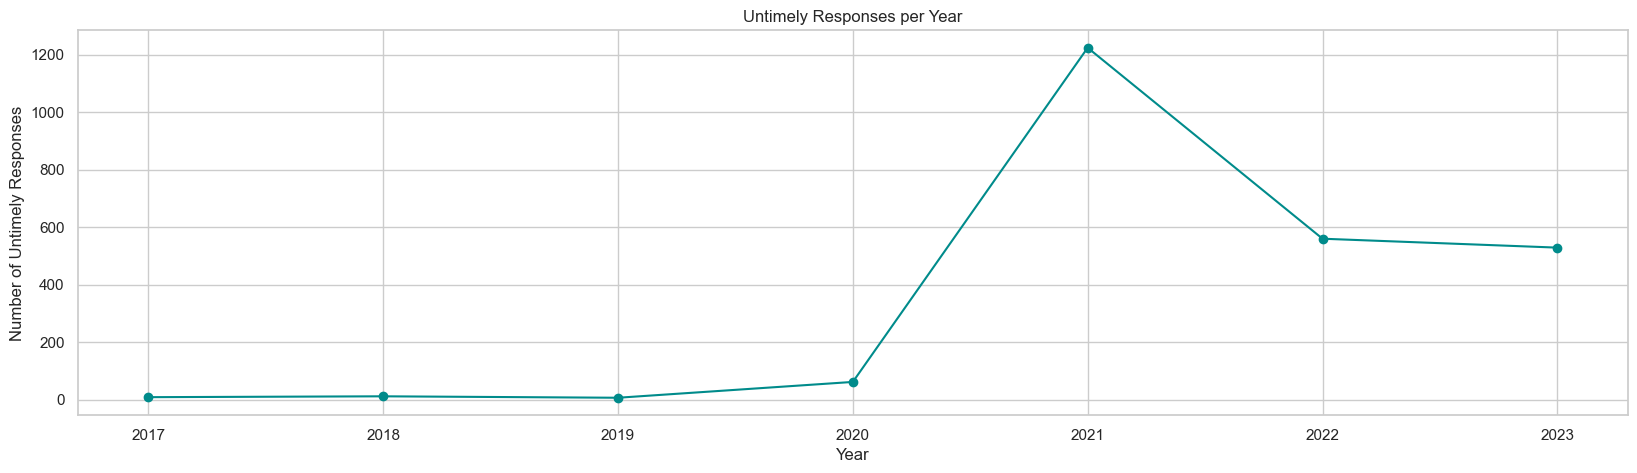

In [121]:
# Visualize untimely responses per year
plt.figure(figsize=(20,5))
plt.plot(untimely_year.index, untimely_year.values, 
         marker='o', color='darkcyan')
plt.title('Untimely Responses per Year')
plt.xlabel('Year')
plt.ylabel('Number of Untimely Responses')
plt.grid(True)
plt.show()


*This helps assess whether the bank’s timeliness in handling complaints has improved or worsened over the years.The chart shows that untimely responses remained very low from 2017 to 2020, but sharply increased in 2021, reaching the highest level in the dataset. After this peak, untimely responses decreased in 2022 and continued to decline slightly in 2023, suggesting partial improvement after the 2021 spike.*

### Multivariate Analysis
This stage examines interactions involving more than two variables, providing deeper insights into timeliness, issues, and trends across multiple dimensions.

#### Heatmap of Timely Response Distribution by Product
We create a matrix of products vs timeliness (Yes/No) and visualize it with a heatmap.

In [102]:
# Product vs Timely response pivot for heatmap
pivot_multi = df.pivot_table(values='Complaint ID',
                             index='Product',
                             columns='Timely response?',
                             aggfunc='count',
                             fill_value=0)
pivot_multi


Timely response?,No,Yes
Product,,
Checking or savings account,867,23237
Credit card or prepaid card,689,15096
"Credit reporting, credit repair services, or other personal consumer reports",475,7045
Debt collection,173,2514
"Money transfer, virtual currency, or money service",140,3244
Mortgage,16,6539
"Payday loan, title loan, or personal loan",10,321
Student loan,0,39
Vehicle loan or lease,33,584


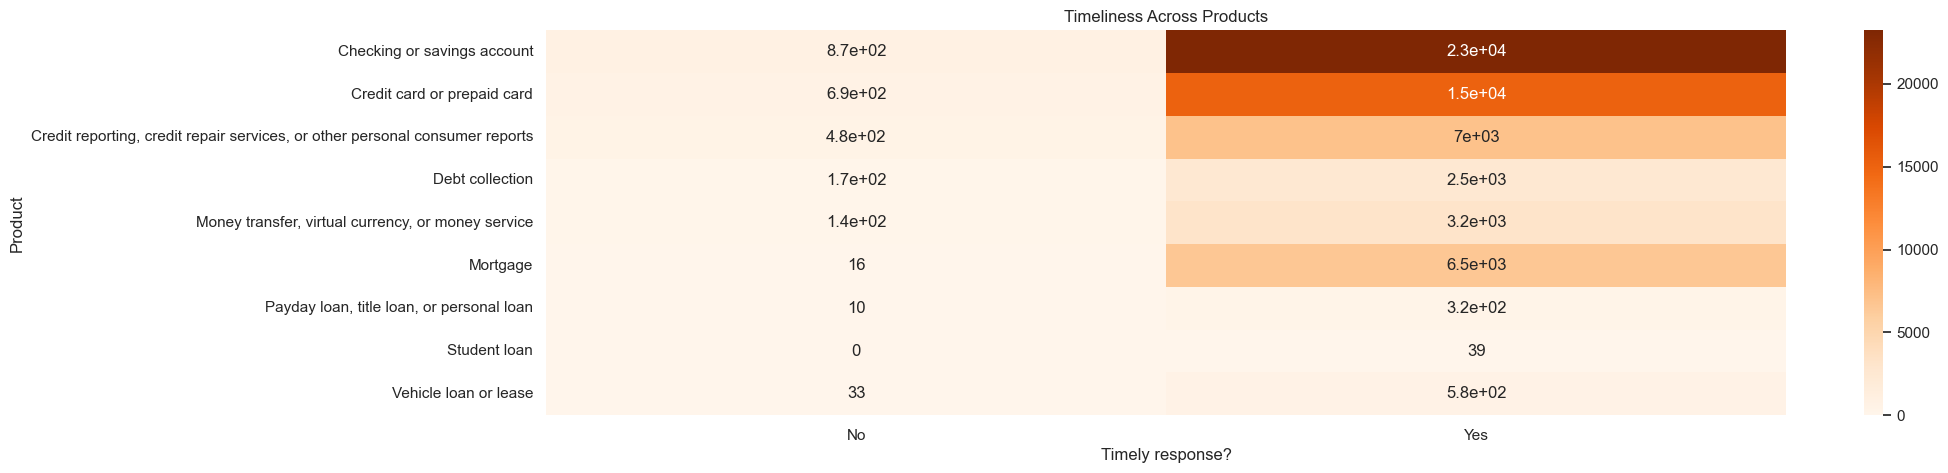

In [122]:
# Visualize timeliness across products
plt.figure(figsize=(20,5))
sns.heatmap(pivot_multi, annot=True, cmap='Oranges')
plt.title('Timeliness Across Products')
plt.show()


*The heatmap shows that most complaints across all products receive timely responses, with checking/savings accounts and credit cards having the highest timely counts. Untimely responses are low overall and mainly occur in these high-volume products.*

#### Yearly Trends in Issues Reported (Issue–Year Heatmap)
*We examine how the frequency of different issues changes by year using a heatmap.*

In [105]:
# Year vs Issue pivot table
year_issue = df.groupby(['Year','Issue'])['Complaint ID'] \
               .count().unstack(fill_value=0)
year_issue.head()


Issue,Advertising,"Advertising and marketing, including promotional offers",Applying for a mortgage or refinancing an existing mortgage,Attempts to collect debt not owed,Can't contact lender or servicer,Can't stop withdrawals from your bank account,Charged fees or interest you didn't expect,Closing an account,Closing on a mortgage,Closing your account,...,Trouble using your card,Unable to get your credit report or credit score,Unauthorized transactions or other transaction problem,Unexpected or other fees,Vehicle was damaged or destroyed the vehicle,Vehicle was repossessed or sold the vehicle,"Was approved for a loan, but didn't receive money","Was approved for a loan, but didn't receive the money",Written notification about debt,Wrong amount charged or received
Year,,,,,,,,,,,,,,,,,,,,,
2017,1,63,128,104,1,1,5,241,79,94,...,41,4,5,17,0,0,0,1,54,3
2018,0,70,131,153,0,0,9,324,90,166,...,48,10,17,26,0,0,0,1,116,6
2019,0,81,151,133,2,0,5,309,83,156,...,54,4,17,22,0,0,0,0,53,3
2020,3,65,186,189,3,0,4,404,124,207,...,43,19,23,152,0,0,1,2,69,7
2021,5,66,190,437,1,0,10,488,124,171,...,48,7,30,188,1,1,0,0,91,17


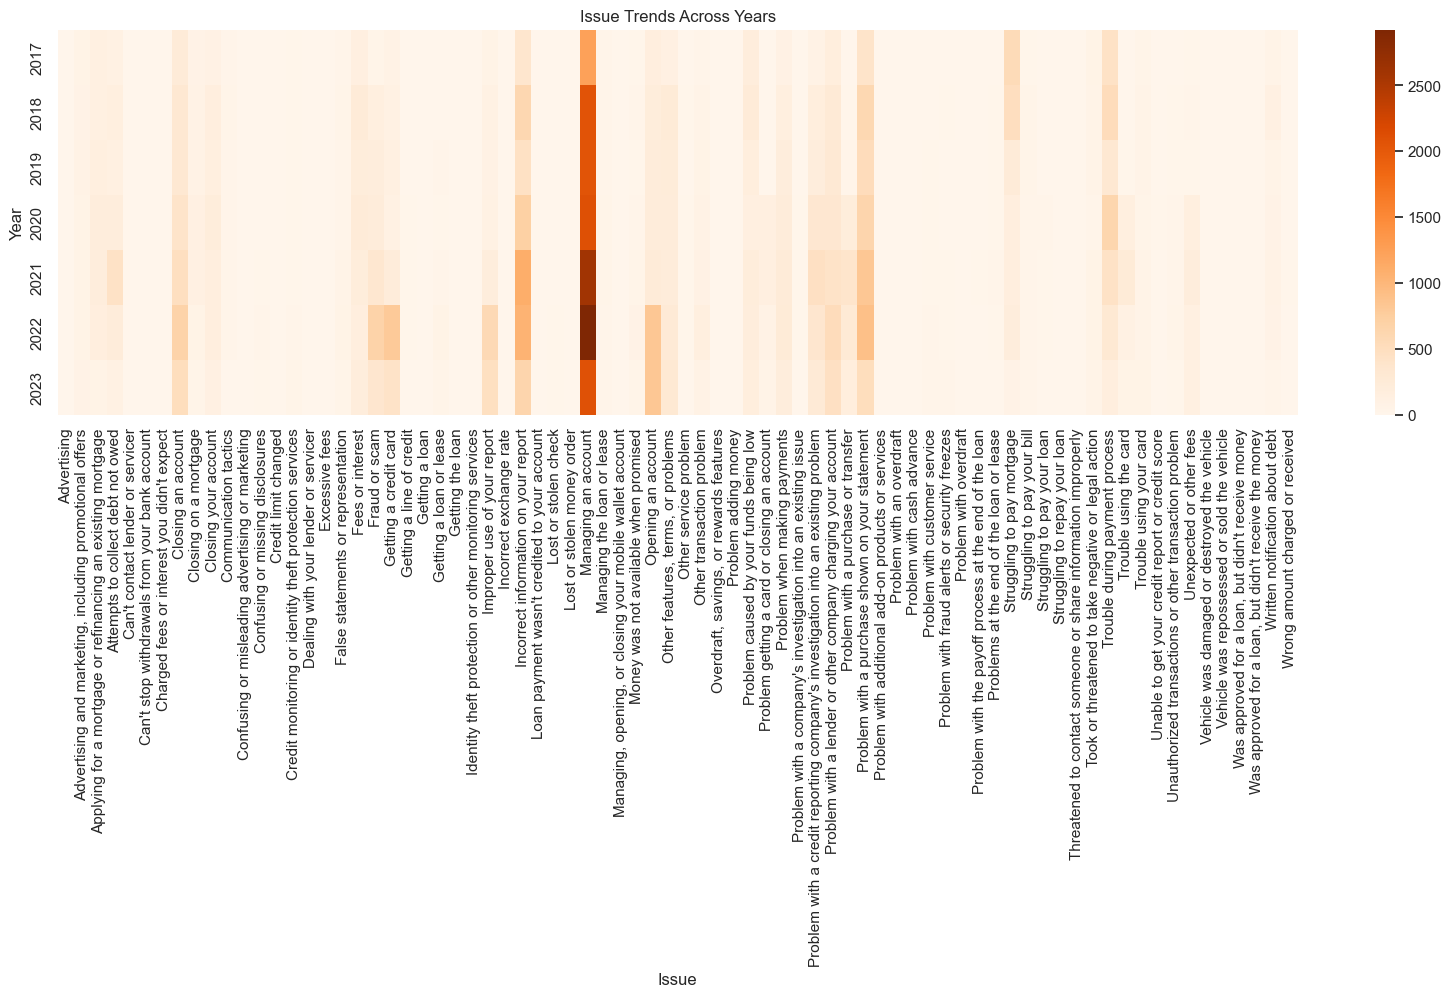

In [123]:
# Visualize issue trends by year
plt.figure(figsize=(20,5))
sns.heatmap(year_issue, cmap='Oranges')
plt.title('Issue Trends Across Years')
plt.xlabel('Issue')
plt.ylabel('Year')
plt.show()


*This reveals which issues have become more common or less common over time, showing how customer concerns have evolved between 2017 and 2023.
The heatmap shows a dramatic spike in 2023 for the issue “Managing an account,” far surpassing all other issue categories across the years. This indicates that account-management problems became a major concern recently, while other issues remain relatively low and stable over time.*

### Correlation Analysis

Correlation analysis identifies relationships between numerical variables.  
Since this dataset is mostly categorical, only a few variables are numeric (e.g., Complaint ID, Year, Month), and producing a correlation matrix or heatmap would not provide any analytical value.


## Key Insights at a Glance

The analysis reveals that Bank of America receives the highest volume of complaints for checking/savings accounts and credit cards, indicating these core banking products are the main sources of customer dissatisfaction. The most common issue by a large margin is “Managing an account,” which consistently appears across products and peaks sharply in recent years. Seasonal trends show complaint volumes rising through mid-year, with July being the highest month. Complaint volumes also steadily increased year-over-year, peaking in 2022 before declining in 2023. Most complaints are submitted online, showing strong customer preference for digital channels. The majority of complaints are resolved in a timely manner, and “Closed with explanation” is the dominant company response across all products, suggesting that most issues are addressed through clarification rather than compensation. Together, these findings highlight operational friction in account management, heavy reliance on digital reporting, and generally strong but uneven response timeliness.